In [41]:
%matplotlib widget
import numpy as np
import seaborn as sns
import pandas as pd
from functools import reduce
from tqdm import tqdm
from collections import defaultdict
from scipy import stats
import matplotlib.pyplot as plt
import sys
import os

In [42]:
def load_csv(path):
    return pd.read_csv(path)

FV10__20190620_111343_univariate_ng2_rstats
/home/dkermany/ripley_results/FV10__20190620_111343_random_univariate_ng2_rstats.csv
0/1: FV10__20190620_111343_univariate_ng2_rstats


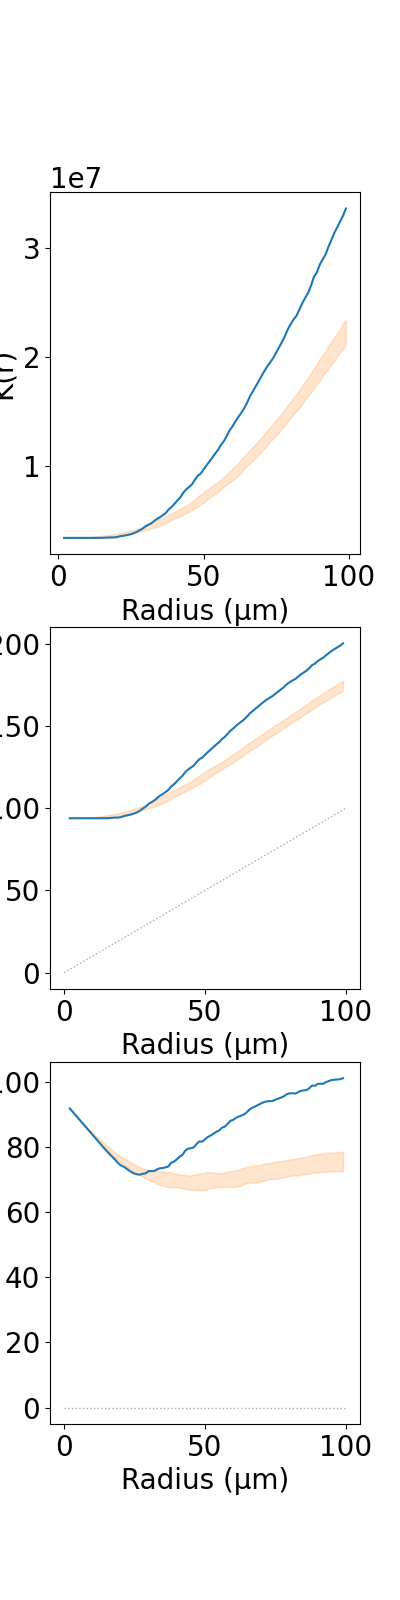

In [43]:
# List of filenames for the CSV files to be processed
filenames = [
    # "FV10__20181106_121902_multivariate_branch_rstats",
    # "FV10__20181009_103052_multivariate_ng2_rstats",
    # "FV10__20181004_122358_multivariate_ng2_rstats",
    # "FV10__20181008_104428_multivariate_ng2_rstats",
    "FV10__20190620_111343_univariate_ng2_rstats",
    # "FV10__20181005_104242_multivariate_ng2_rstats",
    # "FV10__20181106_172421_multivariate_ng2_rstats",
    # "FV10__20190619_111005_multivariate_ng2_rstats",
]

# Loop over each filename
for i, f in enumerate(filenames):
    # Construct the path for the CSV file
    rstats_path = f"/home/dkermany/ripley_results/{f}.csv"
    print(f)
    # Construct the path for the random CSV file
    rand_rstats_path = f"/home/dkermany/ripley_results/FV10__{'_'.join(f.split('_')[2:4])}_random_{f.split('_')[4]}_ng2_rstats.csv"
    print(rand_rstats_path)
    # Print the progress of the processing
    print(f"{i}/{len(filenames)}: {f}")

    # Load the CSV file and random CSV file into DataFrames
    rstats = load_csv(rstats_path)
    rand_rstats = load_csv(rand_rstats_path)
    
    ## Uncomment to restrict maximum radius in the plots
    # Filter the DataFrames to only include rows where the radius is less than or equal to 102
    rstats = rstats[rstats["Radius (r)"] <= 102]
    rand_rstats = rand_rstats[rand_rstats["Radius (r)"] <= 102]
    # print(rstats_path)
    
    # Set the tick label format to plain
    plt.ticklabel_format(style="plain")
    
    # Update the font size for the plot
    plt.rcParams.update({"font.size": 20})
    
    # Create a subplot with 3 rows and 1 column
    f, axes = plt.subplots(3, figsize=(4,16))

    # Plot the K(r) values for the data and the random data
    sns.lineplot(data=rstats, x="Radius (r)", y="K(r)", ax=axes[0])
    sns.lineplot(data=rand_rstats, x="Radius (r)", y="K(r)", ax=axes[0], alpha=0, errorbar=("pi", 95))
    axes[0].set(xlabel="Radius (μm)")
    
    # Plot the L(r) values for the data and the random data
    sns.lineplot(data=rstats, x="Radius (r)", y="L(r)", ax=axes[1])
    sns.lineplot(data=rand_rstats, x="Radius (r)", y="L(r)", ax=axes[1], alpha=0, errorbar=("pi", 95))
    
    # Add a line representing the expected L(r) values
    axes[1].plot([0, 100], [0, 100], linewidth=1, linestyle="dotted", color="#aaa") 
    axes[1].set(xlabel="Radius (μm)")
    
    # Plot the H(r) values for the data and the random data
    sns.lineplot(data=rstats, x="Radius (r)", y="H(r)", ax=axes[2])
    sns.lineplot(data=rand_rstats, x="Radius (r)", y="H(r)", ax=axes[2], alpha=0, errorbar=("pi", 95))
    
    # Add a line representing the expected H(r) values
    axes[2].plot([0, 100], [0, 0], linewidth=1, linestyle="dotted", color="#aaa") 
    axes[2].set(xlabel="Radius (μm)")

    # Uncomment the following line to save the plot as a PNG file
    # plt.savefig(f"/home/dkermany/ripley_plots/{f}.png", dpi=600)
    
    # Display the plot
    plt.show()

In [44]:
rstats

,Unnamed: 0,Radius (r),K(r),L(r),H(r)
0,0,2,3.465217e+06,93.874426,91.874426
1,1,3,3.465217e+06,93.874426,90.874426
2,2,4,3.465217e+06,93.874426,89.874426
3,3,5,3.465217e+06,93.874426,88.874426
4,4,6,3.465217e+06,93.874426,87.874426
...,...,...,...,...,...
93,93,95,3.135568e+07,195.618166,100.618166
94,94,96,3.187481e+07,196.691833,100.691833
95,95,97,3.240692e+07,197.780310,100.780310
96,96,98,3.292605e+07,198.830816,100.830816


In [45]:
rand_rstats

,Unnamed: 0,Radius (r),K(r),L(r),H(r),Line
0,0,2,3.465217e+06,93.874426,91.874426,NaN
1,1,3,3.465217e+06,93.874426,90.874426,NaN
2,2,4,3.465217e+06,93.874426,89.874426,NaN
3,3,5,3.478196e+06,93.991476,88.991476,NaN
4,4,6,3.478196e+06,93.991476,87.991476,NaN
...,...,...,...,...,...,...
9795,9795,95,2.022026e+07,169.004924,74.004924,99.0
9796,9796,96,2.062259e+07,170.118485,74.118485,99.0
9797,9797,97,2.099896e+07,171.147166,74.147166,99.0
9798,9798,98,2.149214e+07,172.476654,74.476654,99.0


In [50]:
def calculate_pi(data, p=0.95):
    """
    Calculate the 95% prediction interval for the given data.

    Parameters:
    data (array-like): A list or array of numerical data points.

    Returns:
    tuple: Lower and upper bounds of the 95% prediction interval.
    """
    # Calculate mean and standard error of the mean
    mean = np.mean(data)
    std = np.std(data, ddof=1)

    # Number of observations
    n = len(data)

    # t-score for 95% prediction interval
    t_score = stats.t.ppf((1 + 0.95) / 2., n-1)

    # Calculate the margin of error for prediction interval
    margin_of_error = t_score * std * np.sqrt(1 + 1/n)

    # Calculate the lower and upper bounds
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound

# Example usage
data = rand_rstats[rand_rstats["Radius (r)"] == 50]["H(r)"].tolist()
lower_bound, upper_bound = calculate_pi(data)
print("95% Confidence Interval:", lower_bound, "to", upper_bound)


95% Confidence Interval: 66.76127321002191 to 71.89497373082479
66.39905853431151


In [53]:
def normalize(data, min_val, max_val):
    """
    Normalize the data to have a lower bound of -1 and upper bound of 1
    with respect to the 95% interval min and max values

    Parameters:
    data (array-like): A list or array of numerical data points.
    min_val (float): min value
    max_val (float): max value

    Returns:
    array: Normalized data with bounds [-1, 1].
    """
    normalized_data = 2 * ((data - min_val) / (max_val - min_val)) - 1
    return normalized_data

print(normalize(66.77, lower_bound, upper_bound))

-0.9966001951447221
